In [61]:
x_train = np.array([1, 2, 3, 4, 5])  # 예시 입력 데이터
y_train = np.array([2, 4, 6, 8, 10])  # 예시 출력 데이터


W = 0.0
b = 0.0

n_data = len(x_train)
epoch = 5000
learning_rate = 0.01

for i in range(epoch):
  hypothesis = x_train * W + b
  cost = np.sum((hypothesis - y_train) ** 2) / n_data
  # 기울기 계산 수정
  gradient_w = np.sum((hypothesis - y_train) * x_train) * 2 / n_data
  gradient_b = np.sum(hypothesis - y_train) * 2 / n_data

  # 파라미터 업데이트
  W -= learning_rate * gradient_w
  b -= learning_rate * gradient_b
  if not i % 100 :
    print(f'Epoch ({i}/{epoch}) cost: {cost}, W: {W}, b:{b}')

print('W: {:10f}'.format(W))
print('b: {:10f}'.format(b))
print('result : ')
print(x_train * W + b)

Epoch (0/5000) cost: 44.0, W: 0.44, b:0.12
Epoch (100/5000) cost: 0.02447442684930146, W: 1.898775997753122, b:0.36545076630285395
Epoch (200/5000) cost: 0.012432209885934168, W: 1.927855802591494, b:0.26046344387458364
Epoch (300/5000) cost: 0.006315156779752394, W: 1.9485815112589555, b:0.18563705935329852
Epoch (400/5000) cost: 0.0032078934894731645, W: 1.9633531028220825, b:0.13230692680978884
Epoch (500/5000) cost: 0.001629505172824526, W: 1.9738810862463791, b:0.09429756613702703
Epoch (600/5000) cost: 0.0008277354335408341, W: 1.9813845725503834, b:0.06720759973626017
Epoch (700/5000) cost: 0.0004204625792941973, W: 1.9867324444499956, b:0.04790008530809561
Epoch (800/5000) cost: 0.00021358126452370824, W: 1.9905439705454586, b:0.034139266712792826
Epoch (900/5000) cost: 0.00010849231014117063, W: 1.993260514892276, b:0.02433167966592831
Epoch (1000/5000) cost: 5.511055188299796e-05, W: 1.995196645723706, b:0.017341633033479752
Epoch (1100/5000) cost: 2.799436130446208e-05, W: 1

In [3]:
import os
import numpy as np

#os.system("curl -L -o ~/content/archive.zip https://www.kaggle.com/api/v1/datasets/download/nehalbirla/vehicle-dataset-from-cardekho")

5888

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maryammanoochehry/car-data")

print("Path to dataset files:", path)

100%|██████████| 3.77k/3.77k [00:00<00:00, 2.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/maryammanoochehry/car-data/versions/1


In [11]:
import pandas as pd

data = pd.read_csv("/root/.cache/kagglehub/datasets/maryammanoochehry/car-data/versions/1/cardata.csv")

In [22]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


- Car_Name : 차량 이름
- Year : 발매 연도
- Selling_Price : 판매 가격
- Present_Price : 시장 가격
- Kms_Driven : 구동 KM
- Fuel_Type : 연료 종류
- Seller_Type : 판매지
- Transmission : 변속 방식
- Owner : 이전 사용자 수

In [66]:
# x = data.drop('Selling_Price',axis=1)
# y = data.loc[:,'Selling_Price']

x = data.drop(['Selling_Price','Fuel_Type','Seller_Type','Transmission','Car_Name'],axis=1)
y = data.loc[:,'Selling_Price']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((201, 4), (100, 4), (201,), (100,))

In [69]:
# 선형 회귀 모델 클래스
class LinearRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        # X에 bias 항 추가
        # np.linalg.inv는 넘파이 선형대수 모듈(linalg)의 inv(역함수)
        # .dot은 행렬 곱셈
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # bias 항 추가
        self.theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)  # 정규 방정식

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # bias 항 추가
        return X_b.dot(self.theta)

# 모델 학습
model = LinearRegression()
model.fit(x_train, y_train)

# 예측
y_predict = model.predict(x_test)


In [70]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

mse = mean_squared_error(y_test, model.predict(x_test))
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 4.02424520742606


In [ ]:
m = 100
# -3~3 범위를 가진 100개의 균일분포 data
X = 6 * np.random.rand(m, 1) - 3
Y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.scatter(X,Y)
plt.show()

In [59]:
#linear regression에서 scalar column을 concatenate시켜준 것 처럼
# 이번엔 X^2항 column까지 concatenate 시켜준다

X_poly = np.array(X**2)
X_poly = np.c_[np.ones((100,1)), X, X_poly]

# np.linalg를 통해 정규방적식 계산
theta_best = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(Y)
theta_best
# theta_best[0] :theta_0 (bias)
# theta_best[0] :theta_1
# theta_best[0] :theta_2

array([[2.05199841],
       [0.91233   ],
       [0.50946884]])

In [ ]:
#predict 에 사용될 X data
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_p = np.c_[np.ones((100,1)), X_new, X_new ** 2]
y_predict = X_new_p.dot(theta_best)

plt.plot(X_new, y_predict, 'r-')
plt.scatter(X,Y)

# pytorch

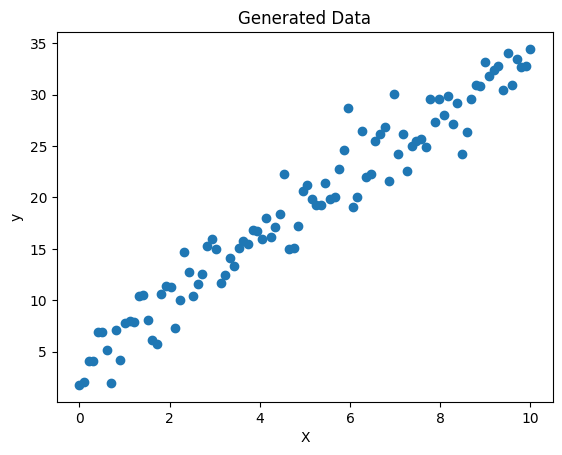

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
torch.manual_seed(0)
X = torch.linspace(0, 10, 100).reshape(-1, 1)  # 입력 데이터 (100, 1)
y = 3 * X + 4 + torch.randn(100, 1) * 2  # 출력 데이터 (100, 1)

# 시각화
plt.scatter(X.numpy(), y.numpy())
plt.xlabel('X')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

In [4]:
import torch.nn as nn

class LinearRegessionModel(nn.Module):
  def __init__(self):
    super(LinearRegessionModel, self).__init__()
    self.linear = nn.Linear(1, 1)  # 입력 1개, 출력 1개

  def forward(self,x):
    return self.linear(x)

model = LinearRegessionModel()

In [5]:
# 손실 함수와 옵티마이저
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
# 학습 루프
num_epochs = 200
for epoch in range(num_epochs):
    # 순전파 단계: 예측값 계산
    y_pred = model(X)

    # 손실 계산
    loss = criterion(y_pred, y)

    # 역전파 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 진행 상황 출력
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [20/200], Loss: 6.7203
Epoch [40/200], Loss: 6.2650
Epoch [60/200], Loss: 5.8919
Epoch [80/200], Loss: 5.5861
Epoch [100/200], Loss: 5.3356
Epoch [120/200], Loss: 5.1302
Epoch [140/200], Loss: 4.9619
Epoch [160/200], Loss: 4.8240
Epoch [180/200], Loss: 4.7110
Epoch [200/200], Loss: 4.6184


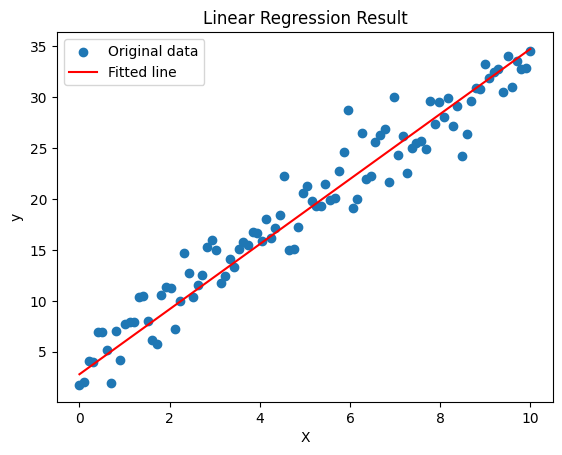

In [7]:
# 학습 후 예측 결과 시각화
predicted = model(X).detach()  # 예측값 계산 및 그래프 그리기

plt.scatter(X.numpy(), y.numpy(), label='Original data')
plt.plot(X.numpy(), predicted.numpy(), 'r-', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Result')
plt.show()


In [8]:
# 학습된 모델 파라미터 출력
[weight], [bias] = model.parameters()
print(f"Learned weight: {weight.item():.4f}, Learned bias: {bias.item():.4f}")


Learned weight: 3.1920, Learned bias: 2.7962


In [80]:
x = data.drop(['Selling_Price','Fuel_Type','Seller_Type','Transmission','Car_Name'],axis=1)
y = data.loc[:,'Selling_Price']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train = torch.tensor(scaler_x.fit_transform(x_train.to_numpy()), dtype=torch.float32)
y_train = torch.tensor(scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)), dtype=torch.float32)
x_test = torch.tensor(scaler_x.transform(x_test.to_numpy()), dtype=torch.float32)
y_test = torch.tensor(scaler_y.transform(y_test.to_numpy().reshape(-1, 1)), dtype=torch.float32)


In [72]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((201, 4), (100, 4), (201,), (100,))

In [89]:
import torch
import torch.nn
import numpy as np
import matplotlib.pyplot as plt

class MultipleLinearRegressionModel(nn.Module):
  def __init__(self):
    super(MultipleLinearRegressionModel, self).__init__()
    self.linear = nn.Linear(4, 1) # 입력 4, 출력 1

  def forward(self, X):
    return self.linear(X)

model = MultipleLinearRegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

num_epoch = 2000
for epoch in range(num_epoch):
  y_pred = model(x_train)
  loss = criterion(y_pred, y_train)
  optimizer.zero_grad()    # 기울기 초기화
  loss.backward()          # 역전파
  optimizer.step()
  if (epoch + 1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{num_epoch}], Loss: {loss.item():.4f}")

# 학습된 모델 파라미터 출력
[weights, bias] = model.parameters()
print(f"Learned weights: {weights.data}, Learned bias: {bias.data}")


Epoch [200/2000], Loss: 0.3584
Epoch [400/2000], Loss: 0.2542
Epoch [600/2000], Loss: 0.2037
Epoch [800/2000], Loss: 0.1787
Epoch [1000/2000], Loss: 0.1660
Epoch [1200/2000], Loss: 0.1592
Epoch [1400/2000], Loss: 0.1555
Epoch [1600/2000], Loss: 0.1533
Epoch [1800/2000], Loss: 0.1519
Epoch [2000/2000], Loss: 0.1511
Learned weights: tensor([[ 0.2722,  0.8714,  0.0302, -0.0718]]), Learned bias: tensor([-0.0019])


In [90]:
model.eval()  # 평가 모드로 전환
with torch.no_grad():
    y_test_pred = model(x_test)
    test_loss = criterion(y_test_pred, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 0.1661
